In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
path = '/sciserver/filedb02-02/ocean/wenrui_temp/heat/'

In [33]:
tend = xr.open_zarr(path+'tendH.zarr')
advj = xr.open_zarr(path+'adv.zarr')
difh = xr.open_zarr(path+'dif_h.zarr')
difv = xr.open_zarr(path+'dif_v.zarr')
forc = xr.open_zarr(path+'forcH.zarr')
fl = xr.open_zarr(path+'tend1N-1.zarr')
tend['tendH'][0] = fl['tendH_first']
tend['tendH'][-1] = fl['tendH_last']

In [34]:
close = tend.tendH - advj.adv-difh.dif_h-difv.dif_v-forc.forcH

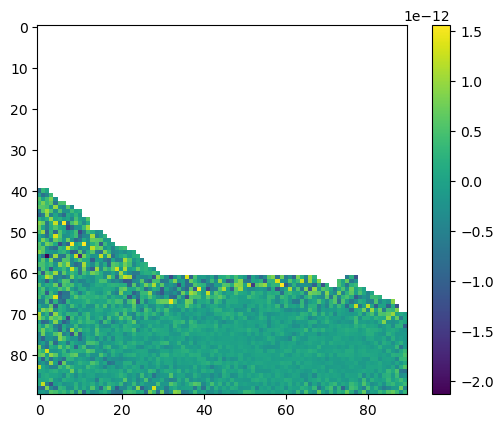

In [36]:
plt.imshow(close[1,0,0])
plt.colorbar()

In [3]:
tend = xr.open_zarr(path+'tendH_j.zarr')
advj = xr.open_zarr(path+'adv_j.zarr')
difh = xr.open_zarr(path+'dif_h_j.zarr')
difv = xr.open_zarr(path+'dif_v_j.zarr')
forc = xr.open_zarr(path+'forcH_j.zarr')

/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.38.0 or higher is recommended. You are running version 2.23.0
  warnings.warn(


In [4]:
close = tend.tendH_j - advj.adv_j-difh.dif_h_j-difv.dif_v_j-forc.forcH_j

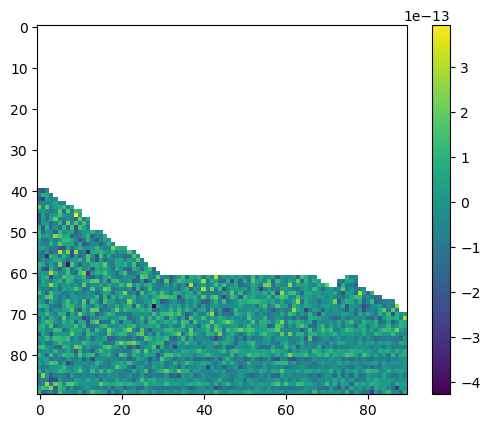

In [5]:
plt.imshow(close[0,0,0])
plt.colorbar()

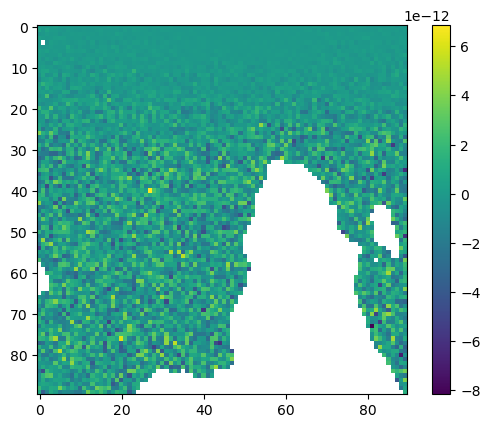

In [6]:
plt.imshow(close[1,1,1])
plt.colorbar()

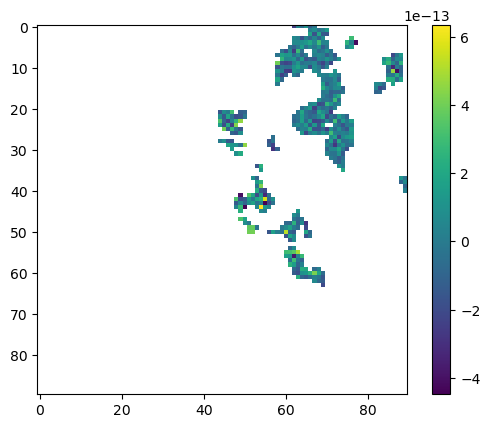

In [7]:
plt.imshow(close[-1,-1,7])
plt.colorbar()

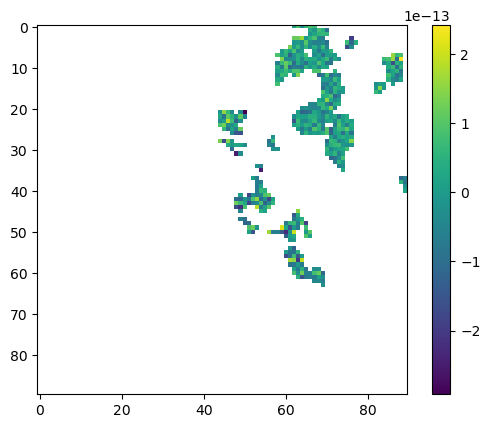

In [8]:
plt.imshow(close[-2,-1,7])
plt.colorbar()

# Check the tdivu decompose

In [9]:
tu = xr.open_zarr(path+'tdivu.zarr')
tyuy = xr.open_zarr(path+'tydivuy.zarr')
tjuj = xr.open_zarr(path+'tjdivuj.zarr')
tyuj = xr.open_zarr(path+'tydivuj.zarr')
tjuy = xr.open_zarr(path+'tjdivuy.zarr')

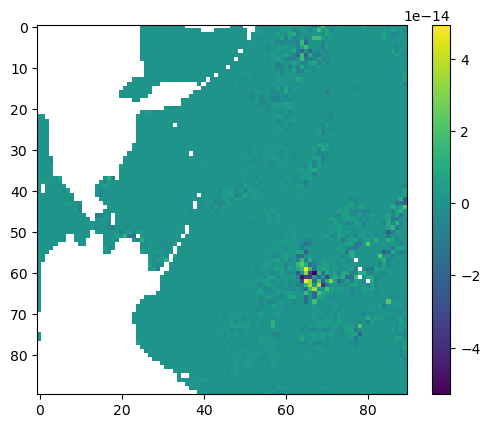

In [10]:
it = 365
iz = 0
fc = 7
plt.imshow(tu.tdivu[it,iz,fc] - tyuy.tydivuy[it,iz,fc] - tjuj.tjdivuj[it,iz,fc] - tjuy.tjdivuy[it,iz,fc] -tyuj.tydivuj[it,iz,fc])
plt.colorbar()

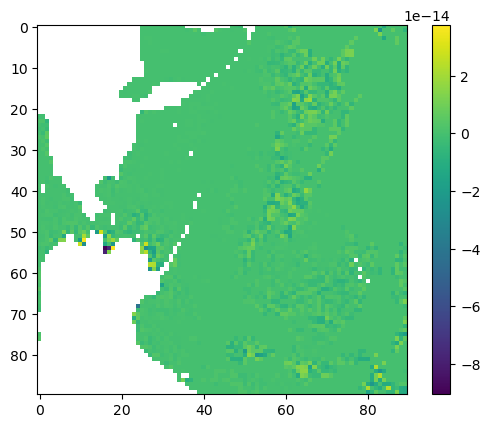

In [11]:
it = -1
iz = 0
fc = 7
plt.imshow(tu.tdivu[it,iz,fc] - tyuy.tydivuy[it,iz,fc] - tjuj.tjdivuj[it,iz,fc] - tjuy.tjdivuy[it,iz,fc] -tyuj.tydivuj[it,iz,fc])
plt.colorbar()

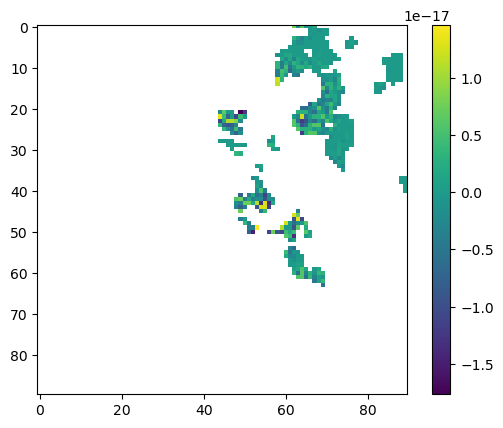

In [12]:
it = -1
iz = -1
fc = 7
plt.imshow(tu.tdivu[it,iz,fc] - tyuy.tydivuy[it,iz,fc] - tjuj.tjdivuj[it,iz,fc] - tjuy.tjdivuy[it,iz,fc] -tyuj.tydivuj[it,iz,fc])
plt.colorbar()

# Check divut decompose

In [13]:
divut = xr.open_zarr(path+'divut.zarr')
seas = xr.open_zarr(path+'divut_seas.zarr')

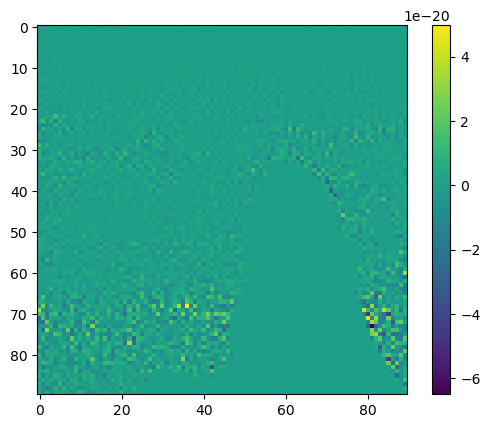

In [14]:
it = 0
iz = 0
fc = 1
plt.imshow(divut.divut[it,iz,fc] - seas.divuyty[it,iz,fc] - seas.divujtj[it,iz,fc] - seas.divuytj[it,iz,fc] -seas.divujty[it,iz,fc])
plt.colorbar()

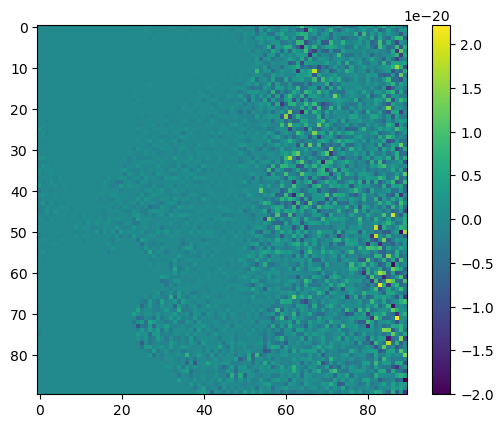

In [15]:
it = -1
iz = 0
fc = 7
plt.imshow(divut.divut[it,iz,fc] - seas.divuyty[it,iz,fc] - seas.divujtj[it,iz,fc] - seas.divuytj[it,iz,fc] -seas.divujty[it,iz,fc])
plt.colorbar()

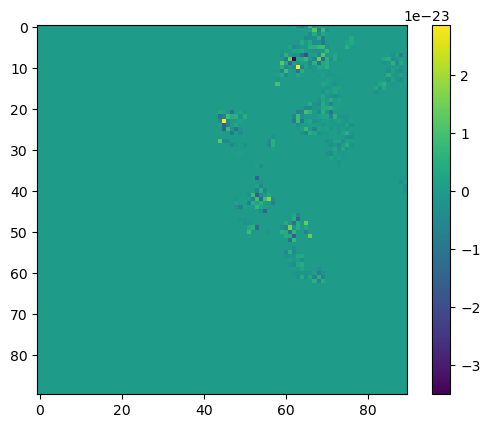

In [16]:
it = -1
iz = -1
fc = 7
plt.imshow(divut.divut[it,iz,fc] - seas.divuyty[it,iz,fc] - seas.divujtj[it,iz,fc] - seas.divuytj[it,iz,fc] -seas.divujty[it,iz,fc])
plt.colorbar()

# Check adv_j decompose

In [17]:
euaj = xr.open_zarr(path+'e_ua_t_j.zarr')
divutj = xr.open_zarr(path+'divut_j.zarr')
close = advj.adv_j - euaj.e_ua_t_j - divutj.divut_j

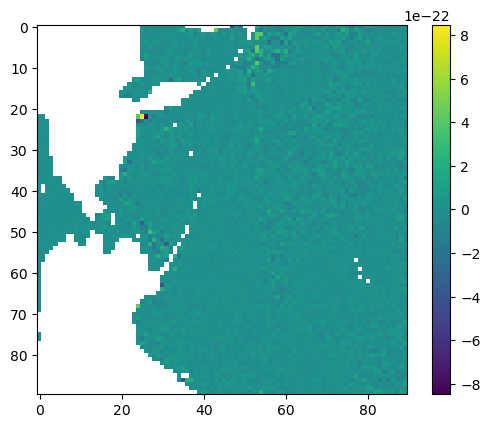

In [18]:
it = 0
iz = 0
fc = 7
plt.imshow(close[it,iz,fc])
plt.colorbar()

In [19]:
essh = xr.open_zarr(path+'e_ssh_t_j.zarr')
tdivuj = xr.open_zarr(path+'tdivu_j.zarr')
tforcj = xr.open_zarr(path+'tforcv_j.zarr')
close = essh.e_ssh_t_j - tforcj.tforcv_j - tdivuj.tdivu_j

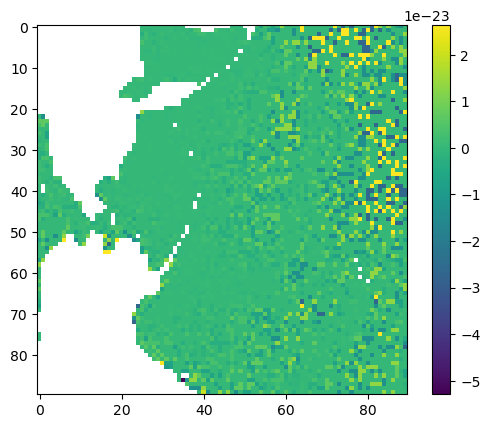

In [20]:
it = 0
iz = 0
fc = 7
plt.imshow(close[it,iz,fc])
plt.colorbar()

In [21]:
ugrd = xr.open_zarr(path+'uygrdty_j.zarr')

In [22]:
close = divutj.divut_j - seas.divujtj[:366].data - ugrd.uygrdty_j + tjuj.tjdivuj.data[:366] - tdivuj.tdivu_j

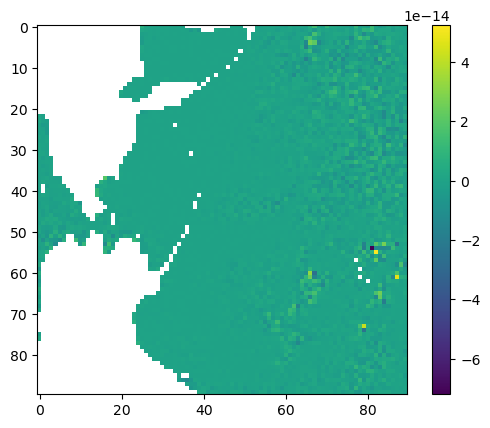

In [23]:
it = -1
iz = 0
fc = 7
plt.imshow(close[it,iz,fc])
plt.colorbar()

# Mean budget

In [24]:
def give_me_ecco_heat_seas(path,wallt_path,time_mean_vel = True):
    adv = xr.open_zarr(path+'adv.zarr')
    dif_h = xr.open_zarr(path+'dif_h.zarr')
    dif_v = xr.open_zarr(path+'dif_v.zarr')
    forch = xr.open_zarr(path+'forcH.zarr')
    tendh = xr.open_zarr(path+'tendH.zarr')

    divut = xr.open_zarr(path+'divut.zarr')
    euat = xr.open_zarr(path+'e_ua_t.zarr')
    tdivu = xr.open_zarr(path+'tdivu.zarr')
    e_ssh = xr.open_zarr(path+'e_ssh_t.zarr')
    
    tenj = xr.open_zarr(path+'tendH_j.zarr')
    advj = xr.open_zarr(path+'adv_j.zarr')
    difhj = xr.open_zarr(path+'dif_h_j.zarr')
    difvj = xr.open_zarr(path+'dif_v_j.zarr')
    forcj = xr.open_zarr(path+'forcH_j.zarr')
    
    uygrdty_j = xr.open_zarr(path+'uygrdty_j.zarr')
    tyuy = xr.open_zarr(path+'tydivuy.zarr')
    tjuj = xr.open_zarr(path+'tjdivuj.zarr')
    tyuj = xr.open_zarr(path+'tydivuj.zarr')
    tjuy = xr.open_zarr(path+'tjdivuy.zarr')

    esshj = xr.open_zarr(path+'e_ssh_t_j.zarr')
    tforcj = xr.open_zarr(path+'tforcv_j.zarr')
    euaj = xr.open_zarr(path+'e_ua_t_j.zarr')
    tforcv = xr.open_zarr(path+'tforcv.zarr')

    seas = xr.open_zarr(path+'divut_seas.zarr')

    tend_ = xr.open_zarr(path+'tend1N-1.zarr')

    txj = xr.open_zarr(path+'txj.zarr')
    tyj = xr.open_zarr(path+'tyj.zarr')
    tzj = xr.open_zarr(path+'tzj.zarr')
    wallt_j = xr.merge([txj,tyj,tzj])
    wallt = xr.open_zarr(wallt_path)

    ds = xr.merge([divut,tendh,wallt,wallt_j])

    ds.tendH[0] = tend_.tendH_first
    ds.tendH[-1]= tend_.tendH_last
    
    ds['U'] = -(tendh['tendH'].groupby('time.dayofyear')-tenj['tendH_j'])
    ds['A'] = (seas.divuytj-tjuy.tjdivuy)
    if time_mean_vel:
        raise NotImplemented('I am a bit lazy')
        # ds['E'] = (divut.divuptp-tpdivup.tpdivup-upgrdtp_m.upgrdtp_m)
        # ds['R'] = -(divut.divumtp-tpdivum.tpdivum)
    else:
        ds['E'] = (-uygrdty_j.uygrdty_j)*xr.ones_like(ds['U']).groupby('time.dayofyear')
        ds['R'] = -(seas.divujty-tyuj.tydivuj+seas.divuyty-tyuy.tydivuy)
    ds['F'] = (tforcj.tforcv_j - tforcv.tforcv.groupby('time.dayofyear'))
    ds['e_ssh'] = (e_ssh.e_ssh_t.groupby('time.dayofyear')-esshj.e_ssh_t_j)
    ds['e_ua'] = (euat.e_ua_t.groupby('time.dayofyear')-euaj.e_ua_t_j)
    ds['dif_h'] = (dif_h.dif_h.groupby('time.dayofyear')-difhj.dif_h_j)
    ds['dif_v'] = (dif_v.dif_v.groupby('time.dayofyear')-difvj.dif_v_j)
    ds['I'] = (forch.forcH.groupby('time.dayofyear')-forcj.forcH_j)
    
    ds['lhs'] = ds['U'] + ds['e_ssh']
    
    ds['txprime'] = (ds['tx'].groupby('time.dayofyear') - ds['txj']).transpose('time','Z','face','Y','Xp1')
    ds['typrime'] = (ds['ty'].groupby('time.dayofyear') - ds['tyj']).transpose('time','Z','face','Yp1','X')
    ds['tzprime'] = (ds['tz'].groupby('time.dayofyear') - ds['tzj']).transpose('time','Zl','face','Y','X')

    rhs_list = ['e_ua','E','dif_h','dif_v','A','I','F']
    termlist = rhs_list+['lhs','R']
    for var in termlist:
        if 'dayofyear' in ds[var].dims:
            print(var)
            raise
        if var == 'E' and not time_mean_vel:
            continue
        ds[var] = ds[var].transpose('time','Z','face','Y','X')
    return ds

In [25]:
wallt_path = '/sciserver/filedb09-01/ocean/wall_theta.zarr'
data_path = '/sciserver/filedb02-02/ocean/wenrui_temp/heat/'
ds = give_me_ecco_heat_seas(data_path,wallt_path,time_mean_vel = False)

/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]
/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]
/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]
/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]
/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an

In [26]:
close = ds['R'] -  ds['A'] - ds['lhs'] - ds['e_ua']-ds['E']-ds['dif_h']-ds['dif_v']-ds['I']-ds['F']

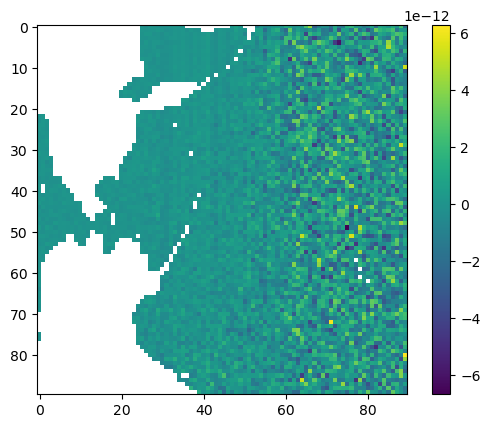

In [27]:
it = -1
iz = 0
fc = 7
plt.imshow(close[it,iz,fc])
plt.colorbar()

# Examine if groupby is doing what I want it to do

In [28]:
# import os
# os.listdir('/sciserver/filedb01-02')
# os.listdir('/sciserver/filedb02-02')
# os.listdir('/sciserver/filedb03-02')
# mean = xr.open_mfdataset('/sciserver/filedb0*-02/ocean/poseidon/daily_mean_ecco/zarr/mean*',engine = 'zarr')
# snap = xr.open_mfdataset('/sciserver/filedb0*-02/ocean/poseidon/daily_mean_ecco/zarr/snap*',engine = 'zarr')
# # grid = xr.open_zarr('~/ECCO_transport')
# # bc = xr.open_zarr('/sciserver/filedb09-01/ocean/GM_vel.zarr') #bolus correct
# ds = xr.merge([mean, snap])

# it = 730
# print(ds['time'][it].values)
# day_of_year = np.datetime64(ds['time'][it].values, 'D').astype('datetime64[D]').astype('O').timetuple().tm_yday
# day_of_year

# advj.dayofyear

# import pandas as pd

# pd.to_datetime(ds['time'][365].values).dayofyear

# pd.to_datetime(ds['time'][730].values).dayofyear

# toy = ds.isel(time = slice(731))

# avg = toy['THETA'].groupby('time.dayofyear').mean('time')

# avg

# plt.imshow(avg[365,1,1]-ds.THETA[365,1,1])

# should_same = np.nan_to_num(np.array(avg[365] - ds.THETA[365]))

# np.allclose(should_same,0)